In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
num_points = 2000
num_samples = 10000
sinewave_low_bound  = -3
sinewave_up_bound   = 3
c_low = -2
c_high = 2

In [3]:
import numpy as np

def generate_sine_data(num_points, num_samples, c_low=0, c_high=1):
    # Generate x values (same for all samples)
    x = np.linspace(sinewave_low_bound, sinewave_up_bound, num_points)
    
    # Sample parameters
    c = np.random.uniform(c_low, c_high, size=(num_samples, 3))
    
    # Generate y values for each sample
    y = np.zeros((num_samples, num_points))
    for i in range(num_samples):
        c1, c2, c3 = c[i]
        y[i] = np.cos(c1 * np.pi * x) - np.sin(c2 * np.pi * x**2) * np.cos(c3 * np.pi * x**3)
    
    return x, c, y

# Usage

x, c, y = generate_sine_data(num_points, num_samples, c_low, c_high)

print(f'x shape = {x.shape}')
print(f'c shape = {c.shape}')
print(f'y shape = {y.shape}')

x shape = (2000,)
c shape = (10000, 3)
y shape = (10000, 2000)


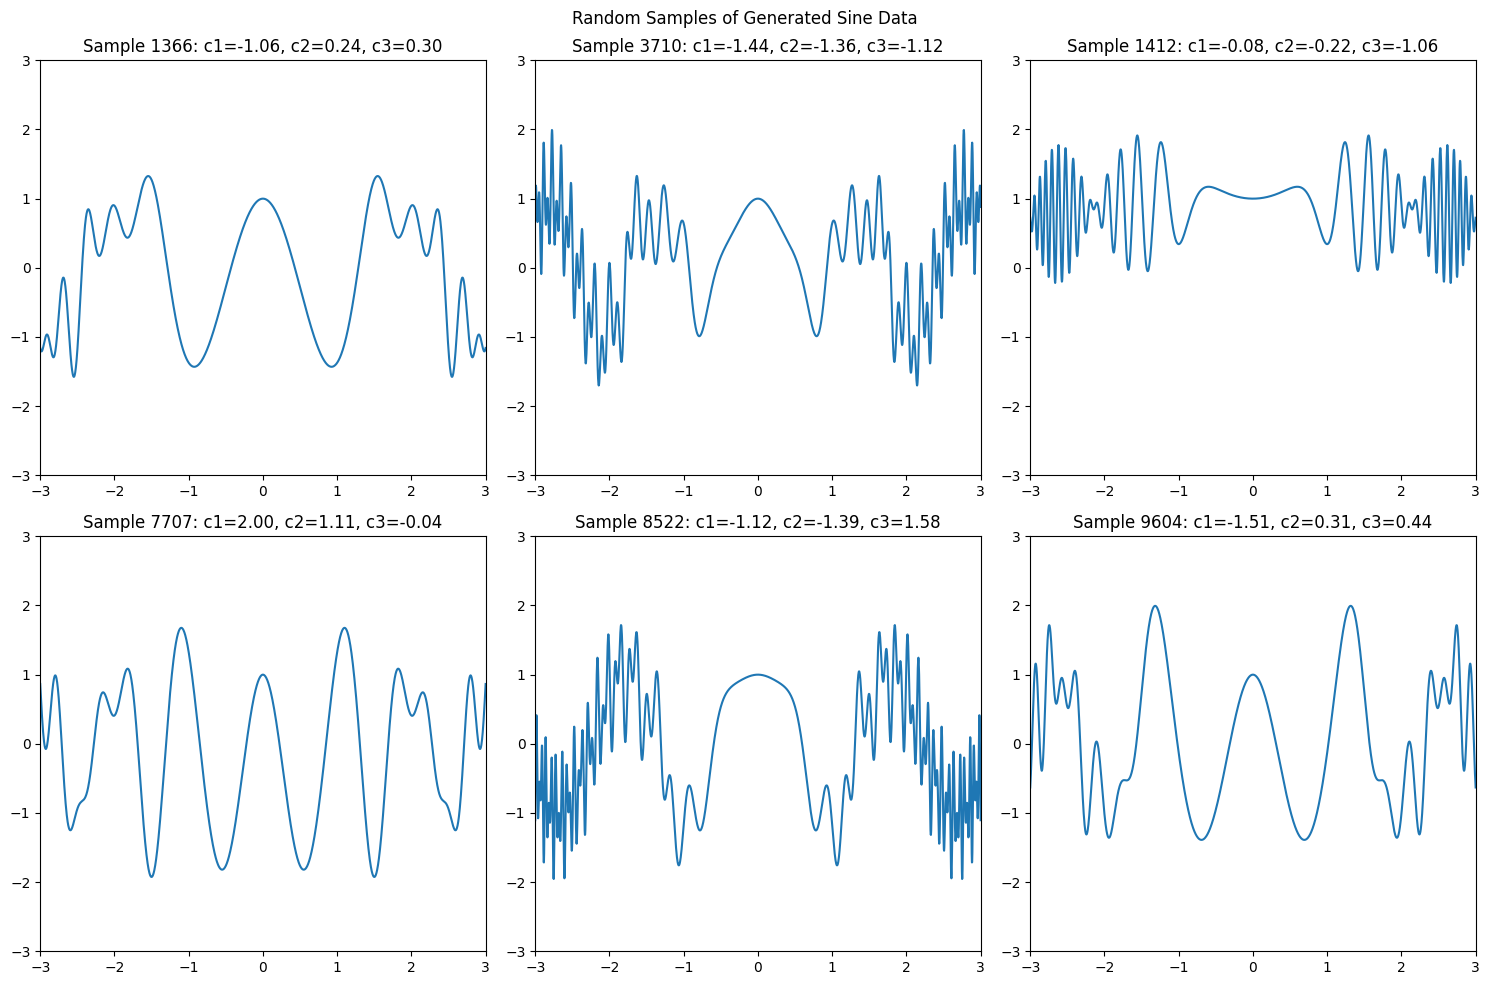

In [4]:
selected_indices = np.random.choice(num_samples, 6, replace=False)

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Random Samples of Generated Sine Data')

# Plot each selected sample
for i, idx in enumerate(selected_indices):
    row = i // 3
    col = i % 3
    axs[row, col].plot(x, y[idx])
    axs[row, col].set_title(f'Sample {idx+1}: c1={c[idx,0]:.2f}, c2={c[idx,1]:.2f}, c3={c[idx,2]:.2f}')
    axs[row, col].set_xlim(sinewave_low_bound, sinewave_up_bound)
    axs[row, col].set_ylim(-3, 3)

plt.tight_layout()
plt.show()

In [5]:
c_train, c_test, y_train, y_test = train_test_split(c, y, test_size=0.2, random_state=42)

np.save('x.npy', x)
np.save('c_train.npy', c_train)
np.save('y_train.npy', y_train)

# Save testing data
np.save('x.npy', x)
np.save('c_test.npy', c_test)
np.save('y_test.npy', y_test)

print("Data split and saved successfully.")
print(f"Training samples: {len(c_train)}")
print(f"Testing samples: {len(c_test)}")

Data split and saved successfully.
Training samples: 8000
Testing samples: 2000
